In [17]:
import cv2
import os
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input,AveragePooling2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer

In [83]:
datadir = "C:\\Users\\snsha\\Desktop\\Anomaly detection\\Dataset"
cat = ["Non-violence", "Violence"]
training_data = []
for cate in cat:
    path = os.path.join(datadir,cate)
    class_num = cat.index(cate)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = new_array = cv2.resize(img_array,(224,224))
        new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
        training_data.append([new_array,class_num])
random.shuffle(training_data) # shuffling the dataset 
X = []
Y = []
for features,labels in training_data:
    X.append(features)
    Y.append(labels)
#saving the dataset as pickle file 
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()
#slpitting images into test and train sets
x_train_orig, x_test_orig, y_train_orig, y_test_orig = train_test_split(X, Y, test_size=0.15, random_state=1)

x_train = np.array(x_train_orig)
x_test = np.array(x_test_orig)
y_train = np.array(y_train_orig)
y_test = np.array(y_test_orig)



[1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 0 0 0 0 1 0 1 1 0]


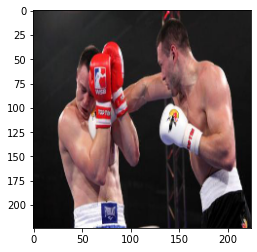

In [84]:
plt.imshow(x_test[0])
print(y_test)

In [86]:
#def convert_to_one_hot(labels, C):
    #C = tf.constant(C, name = "C")
    #one_hot_matrix = tf.one_hot(labels,C,axis = 0)
    #return one_hot_matrix
#y_train = convert_to_one_hot(y_train, 2)
#y_test = convert_to_one_hot(y_test, 2)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)



In [87]:
train_aug = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

test_aug = ImageDataGenerator()


In [88]:
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
train_aug.mean = mean
val_aug.mean = mean

In [89]:
preModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
preModel.trainable = False

In [90]:
headModel = preModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [91]:
model = Model(inputs=preModel.input, outputs=headModel)
#model.summary()

In [92]:
opt = SGD(lr=0.01, momentum=0.9, decay=1e-4 / 30)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [93]:
trained_model = model.fit(
    x = train_aug.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=len(x_train) // 32,
    validation_data=test_aug.flow(x_test, y_test),
    validation_steps=len(x_test) // 32,
    epochs=30)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 21 steps, validate for 3 steps
Epoch 1/30
21/21 [==============================] - 248s 12s/step - loss: 0.8514 - accuracy: 0.5000 - val_loss: 0.7425 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 263s 13s/step - loss: 0.7238 - accuracy: 0.5000 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 244s 12s/step - loss: 0.7016 - accuracy: 0.5000 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 233s 11s/step - loss: 0.6973 - accuracy: 0.5000 - val_loss: 0.7019 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 243s 12s/step - loss: 0.6961 - accuracy: 0.5000 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 234s 11s/step - loss: 0.6952 - accuracy: 0.5000 - val_loss: 0.6986 - val_accuracy: 0.5000
Epoch 7/30
21/21 [==============================] - 232s 

KeyboardInterrupt: 

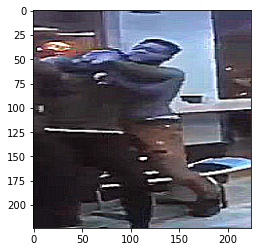

In [14]:
img_array = cv2.imread("D:\\Anomaly detection\\temp-1\\V_992 1.jpg")
img_array = cv2.resize(img_array,(224,224))
filter = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
new_img = cv2.filter2D(img_array, -1, filter)
plt.imshow(new_img)

In [18]:
model = keras.models.load_model('C:\\Users\\snsha\\Desktop\\Anomaly detection\\anomalydetection_ResentV2_1.h5')


ValueError: Unknown layer: Functional